In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
SEED_VALUE = 42

#fix seed to make training deterministics
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [4]:
# Load the Boston Housing dataset
(X_train, y_train),(X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print("\n")
print("Input features", X_train[0])
print("\n")
print("Output target ",y_train[0])


57026/57026 [==============================] - 0s 2us/step
(404, 13)


Input features [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target  15.2


# Extract features from the dataset

In [6]:
boston_features = {
    "Average Number of rooms": 5,
}

X_train_1d = X_train[:,boston_features["Average Number of rooms"]]
print(X_train_1d.shape)

X_test_1d = X_test[:,boston_features["Average Number of rooms"]]
print(X_test_1d.shape)

(404,)
(102,)


# plot features

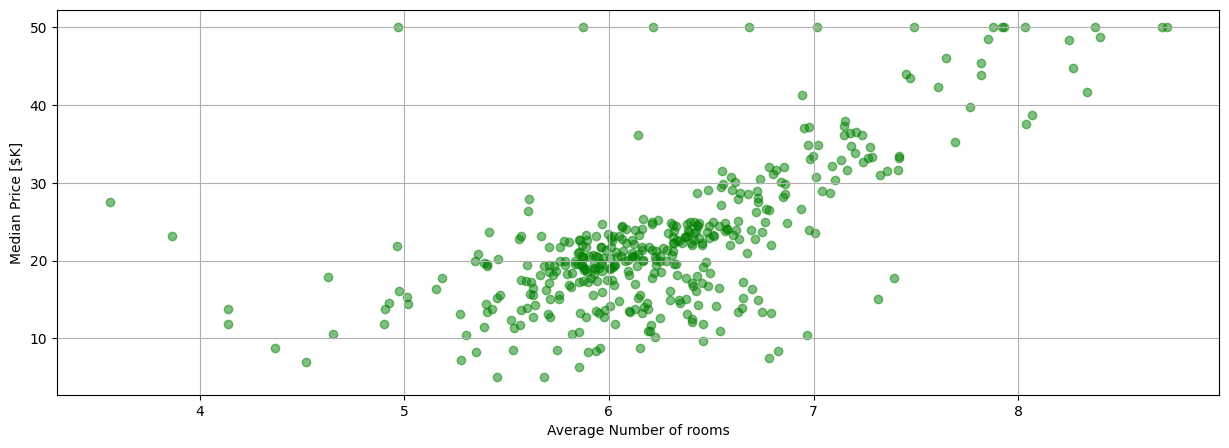

In [7]:
plt.figure(figsize=(15,5))

plt.xlabel("Average Number of rooms")
plt.ylabel("Median Price [$K]")
plt.grid("on")
plt.scatter(X_train_1d[:],y_train, color="green", alpha=0.5)

# Define the Keras Model

In [10]:
model = Sequential()

#define the model consisiting of a single nruron
model.add(Dense(units=1, input_shape=(1,)))

#display a summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile the model

In [12]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")

# Train

In [14]:
history = model.fit(X_train_1d, y_train, batch_size=16, epochs=101, validation_split=0.3,)

Epoch 1/101

18/18 [==============================] - 2s 16ms/step - loss: 955.4662 - val_loss: 1046.5339
Epoch 2/101
18/18 [==============================] - 0s 3ms/step - loss: 911.4420 - val_loss: 1005.1163
Epoch 3/101
18/18 [==============================] - 0s 3ms/step - loss: 873.5770 - val_loss: 966.2827
Epoch 4/101
18/18 [==============================] - 0s 3ms/step - loss: 837.3068 - val_loss: 928.2256
Epoch 5/101
18/18 [==============================] - 0s 4ms/step - loss: 801.5104 - val_loss: 890.5599
Epoch 6/101
18/18 [==============================] - 0s 5ms/step - loss: 766.5916 - val_loss: 854.1418
Epoch 7/101
18/18 [==============================] - 0s 3ms/step - loss: 732.6752 - val_loss: 818.2206
Epoch 8/101
18/18 [==============================] - 0s 3ms/step - loss: 699.7296 - val_loss: 783.9274
Epoch 9/101
18/18 [==============================] - 0s 3ms/step - loss: 667.5803 - val_loss: 749.8492
Epoch 10/101
18/18 [==============================] - 0s 3ms/step - l

# plot results

In [15]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history["loss"],'g',label='Training Loss')
    plt.plot(history.history["val_loss"],'b',label='Validation Loss')
    plt.xlim([0,100])
    plt.ylim([0,300])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

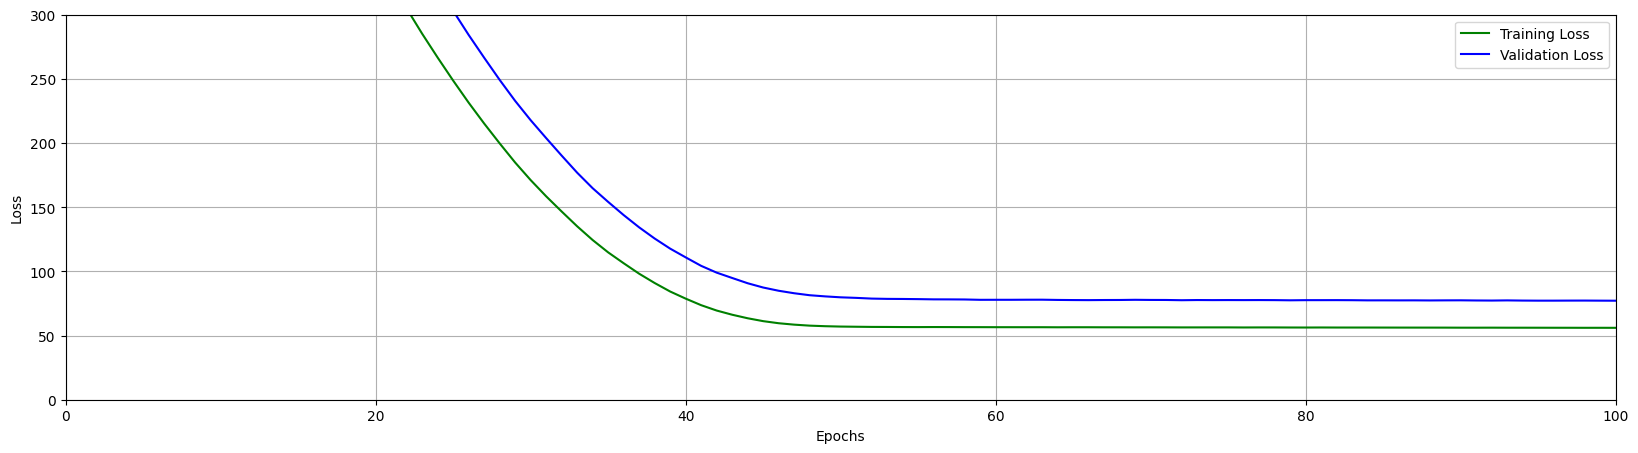

In [17]:
plot_loss(history)

# Make predictions

In [18]:
# predict the median price of a home with [3,4,5,6,7] rooms
x = [3,4,5,6,7]
y_pred = model.predict(x)
for idx in range(len(x)):
    print(f"Predicted price of a home with {x[idx]} rooms:${int(y_pred[idx] * 10) / 10}K")

1/1 [==============================] - 2s 2s/step
Predicted price of a home with 3 rooms:$12.4K
Predicted price of a home with 4 rooms:$15.4K
Predicted price of a home with 5 rooms:$18.4K
Predicted price of a home with 6 rooms:$21.5K
Predicted price of a home with 7 rooms:$24.5K


C:\Users\dkout\AppData\Local\Temp\ipykernel_672\4195099644.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted price of a home with {x[idx]} rooms:${int(y_pred[idx] * 10) / 10}K")


# Plot the model 

In [20]:
#enerate feature data that spans the range of interest for the independent variable
x = np.linspace(3,9,10)

#use the model to predict the dependent variable
y = model.predict(x)

1/1 [==============================] - 0s 46ms/step


In [22]:
def plot_data(x_data, y_data, x, y, title=None):
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y,color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel("Average Number of rooms")
    plt.ylabel("Price [$K]")
    plt.title(title)
    plt.grid(True)
    plt.show()

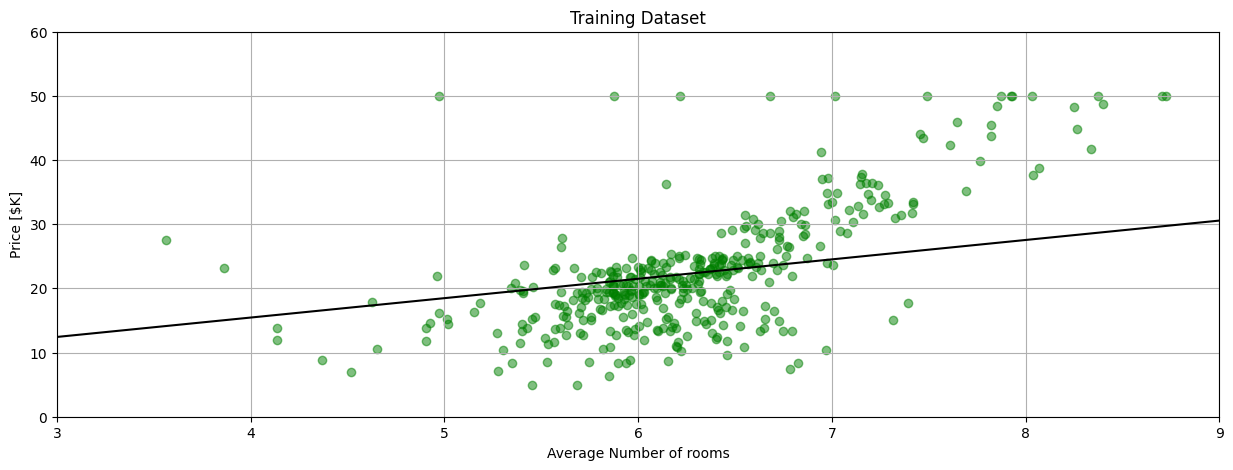

In [23]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

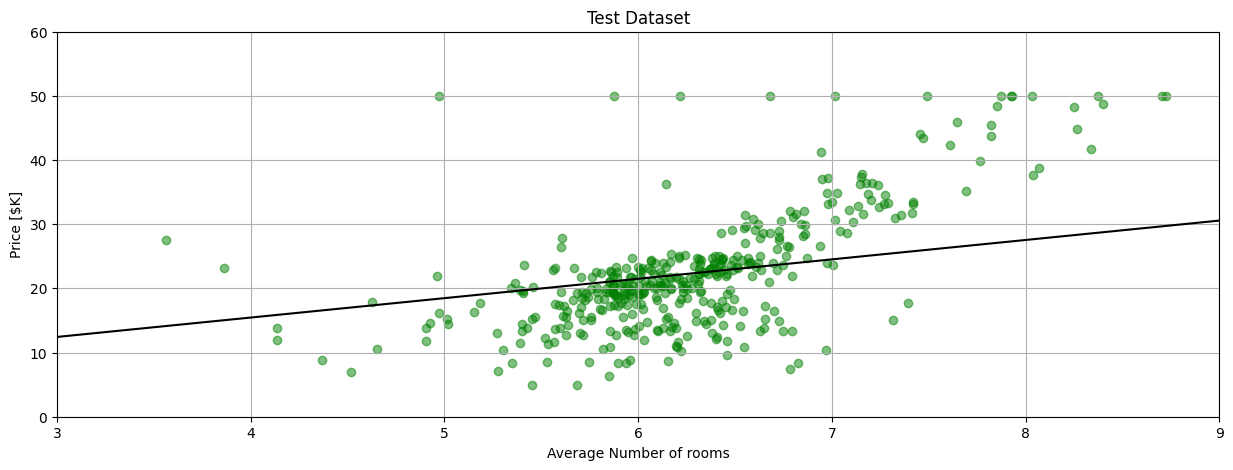

In [24]:
plot_data(X_train_1d, y_train, x, y, title='Test Dataset')